# 120 YILLIK OLiMPiYAT TARiHi VERi SETi

Olimpiyat oyunları, yaz ve kış olimpiyat oyunları olmak üzere iki ayrı kategoride, 4 yılda bir düzenlenen uluslararası çok sporlu etkinlik, 200’ün üzerinde ülkeyi temsil eden sporcuların katıldığı etkinlikler, dünyanın en kapsamlı spor etkinliği konumundadır.

Temelleri MÖ 8. Yüzyılda Olimpiya’da gerçekleştirilen antik oyunlara dayansa da modern oyunların ilki 1896 yılında, Pierre de Coubertin’in Uluslararası Olimpiyat Komitesi(kısaca IOC) kurması sonrasında gerçekleştirildi. 1924 yılında, kış sporları etkinliklerinin yer aldığı Kış Olimpiyatları düzenlenmeye başlandı. I. Dünya Savaşı sebebiyle 1916’daki oyunlar, II. Dünya Savaşı sebebiyle ise 1940 ve 1944’teki oyunlar gerçekleştirilemedi. Her iki etkinlik son olarak 1992’de aynı yıl içerisinde gerçekleştirildi ve 1994’te düzenlenen Kış olimpiyatları ile birlikte iki etkinlik arasında ikişer yıllık fark oluştu.

Veri setine ulaşmak için :
https://www.kaggle.com/mysarahmadbhat/120-years-of-olympic-history
    - athlete_events.csv


120 yıllık olimpiyat veri seti, Atina 1896’dan Rio 2016’ya kadar tüm oyunlar da dahil olmak üzere modern olimpiyat oyunlarına ilişkin tarihsel bir veri kümesidir.

Veri seti içerisinde bulunan sütunların isimleri ve açıklamaları

1.    ID – Her sporcu için benzersiz numara

2.    Name – Sporcunun ismi

3.    Sex – Cinsiyet: M(Erkek) – F(Kadın)

4.    Age – Yaş

5.    Height – Boy (cm)

6.    Weight – Ağırlık (kg)

7.    Team – Takım adı

8.    NOC – Ulusal olimpiyat komitesi 3 harfli kod

9.    Games – Yıl ve sezon

10.   Year – Yıl

11.   Season – Sezon – Yaz ya da Kış

12.   City – Düzenlenen şehir

13.   Sport – Spor

14.   Event – Etkinlik

15. Medal – Madalya: Altın, Gümüş, Bronz ve Madalya yok

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

#Python'da uyarıları kapatalım
import warnings
warnings.filterwarnings("ignore")

In [2]:
#veriyi içeri aktaralım
veri = pd.read_csv("olimpiyat.csv")
veri.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Veri Hakkında Bilgi

In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# Verinin Temizlenmesi

    * Sütun isimlerinin düzenlenmesi
    * Yararsız verinin çıkarılması ve düzenlenmesi
    * Kayıp veri sorunu

## Sütun İsimlerinin Düzenlenmesi

In [4]:
veri.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
#sütun isimlerini değiştirelim
veri.rename(columns={"ID":"id",
                     "Name": "isim",
                     "Sex":"cinsiyet",
                     "Age": "yas",
                     "Height": "boy",
                     "Weight": "kilo",
                     "Team":"takim",
                     "NOC": "uok",
                     "Games":"oyunlar",
                     "Year": "yil",
                     "Season": "sezon",
                     "City": "sehir",
                     "Sport": "spor",
                     "Event":"etkinlik",
                     "Medal": "madalya"}, inplace = True)
#mevcut sütunun üzerine yaz--- inplace = True
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


## Yararsız Verinin Çıkarılması

* id sütunu veri hakkında herhangi bir bilgi vermediği için çıkarlacaktır.
* Oyunlar sütunu yıl ve sezon sütunlarının birleşimi olduğu için yararsız veri olarak kabul edilir ve çıkarılabilir.

In [6]:
#drop fonksiyonu ile id ve oyunlar sütununu çıkaralım
veri = veri.drop(["id","oyunlar"],axis = 1) #axis = 1 sütun manasında
veri.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


## Kayıp Veri Sorunu
* NaN (not a number) 

* Kayıp veri ile mücadele etmek için;
1. Kayıp veriye ait örnekler veriden çıkarılabilir.
2. Kayıp veriler asıl verinin dağılımını bozmayacak şekilde asıl verinin ortalama ya da medyan değerlerine göre doldurulabilir.
* Bu veri üzerinde çalışırken,
    1. Boy ve kilo sütununda bulunan kayıp veriyi etkinlik ortalamasına göre dolduracağız.
    2. Yaş sütununda bulunan kayıp veriyi veri setinin yaş ortalamasına göre dolduracağız.
    3. Madalya alamayan sporcuları veri setinden sileceğiz.

In [7]:
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Boy ve Kilo Sütunu Kayıp Veri Doldurma

In [8]:
essiz_etkinlik =pd.unique(veri.etkinlik)   # Kategorik veride kaç farklı kategori olduğunu bulmak için - unique fonksiyonu
print("Eşsiz etkinlik sayısı : {}".format(len(essiz_etkinlik)))
#ilk on tanesine bakalım
essiz_etkinlik[:10]

Eşsiz etkinlik sayısı : 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [10]:
#her bir etkinliği iteratif olarak dolaş
#her bir etkinlik özelinde boy ve kilo ortalamalarını hesapla
#etkinlik özelinde kayıp boy ve kilo değerlerini etkinlik ortalamalarına eşitle

veri_gecici = veri.copy() #gerçek veriyi bozmamak için
boy_kilo_liste = ["boy","kilo"]

for e in essiz_etkinlik:
    #etkinlik filtresi oluştur
    etkinlik_filtre = veri_gecici.etkinlik == e
    #veriyi etkinliğe göre filtreleyelim
    veri_filtreli = veri_gecici[etkinlik_filtre]
    
    #boy ve kilo için etkinlik özelinde ortalamaları hesaplayalım
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama):  #eğer etkinlik özelinde ortalama varsa
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else:  #eğer etkinlik özelinde ortalama yoksa ortalamayı hesapla
            tum_veri_ortalaması = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalaması)
        #kayıp değerleri doldurulmuş olan veriyi, veri_gecici ye eşitleyelim
        veri_gecici[etkinlik_filtre] = veri_filtreli
        
#kayıp değerleri giderilmiş olan geçici veriyi gerçek veriye eşitle
veri = veri_gecici.copy()
veri.info()  #boy ve kilo sütunlarında kayıp değer sayısına bakalım

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
isim        271116 non-null object
cinsiyet    271116 non-null object
yas         261642 non-null float64
boy         271116 non-null float64
kilo        271116 non-null float64
takim       271116 non-null object
uok         271116 non-null object
yil         271116 non-null int64
sezon       271116 non-null object
sehir       271116 non-null object
spor        271116 non-null object
etkinlik    271116 non-null object
madalya     39783 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


## Yaş Sütunu Kayıp Veri Doldurma

In [11]:
#yaş sütunundaki verilerin ortalamasını alalım
yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("Yaş ortalaması : {}".format(yas_ortalamasi))
#bu sütundaki eksik verileri ortalama ile dolduralım
veri["yas"] = veri["yas"].fillna(yas_ortalamasi)
veri.info()

Yaş ortalaması : 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
isim        271116 non-null object
cinsiyet    271116 non-null object
yas         271116 non-null float64
boy         271116 non-null float64
kilo        271116 non-null float64
takim       271116 non-null object
uok         271116 non-null object
yil         271116 non-null int64
sezon       271116 non-null object
sehir       271116 non-null object
spor        271116 non-null object
etkinlik    271116 non-null object
madalya     39783 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


## Madalya Alamayan Sporcuları Veri Setinden Çıkar

In [12]:
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [13]:
#isnull sonucu boolean (True, False) şeklinde çıkarır
#isnull'un tersini '~' ile alarak eksik verileri ayıklamış oluyoruz
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

#filtreyi veri'ye uyguladığımızda True olan değerler yerinde kalırken False değerler veri setinden çıkarılıyor
veri = veri[madalya_degiskeni_filtresi]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [19]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
isim        39783 non-null object
cinsiyet    39783 non-null object
yas         39783 non-null float64
boy         39783 non-null float64
kilo        39783 non-null float64
takim       39783 non-null object
uok         39783 non-null object
yil         39783 non-null int64
sezon       39783 non-null object
sehir       39783 non-null object
spor        39783 non-null object
etkinlik    39783 non-null object
madalya     39783 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [14]:
#sonradan kullanabilmek için veriyi kaydedelim
veri.to_csv("olimpiyat_temizlenmis.csv",index=False)

# Tek Değişkenli Veri Analizi

Bu bölümde veri içerisinde bulunan sayısal ve kategorikk verilerin tek tek incelemesini yapacağız.
* Sayısal Değişkenler:  (histogram-kutu grafiği)
    1. yas
    2. boy
    3. kilo
    4. yil
* Kategorik Değişkenler:   (çubuk grafiği)
    1. isim
    2. cinsiyet
    3. takim
    4. uok
    5. sezon
    6. sehir
    7. spor
    8. etkinlik
    9. madalya
    
## Sayısal Değişkenler

In [15]:
#histogram grafiklerini çizdireceğimiz fonksiyonu yazalım
def plotHistogram(degisken):
    
    '''
        Girdi: Değişken/sütun ismi
        Çıktı: İlgili değişkenin histogramı
    '''
    plt.figure()
    plt.hist(veri[degisken],bins=85,color="orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
        

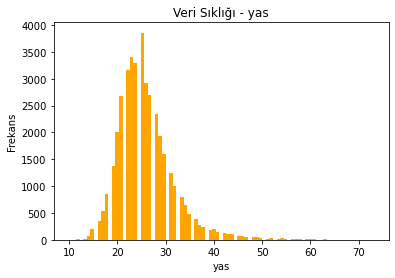

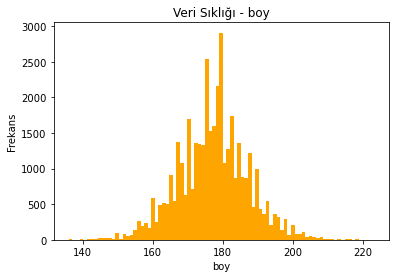

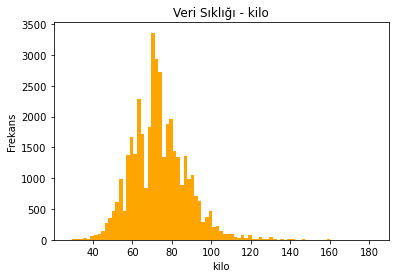

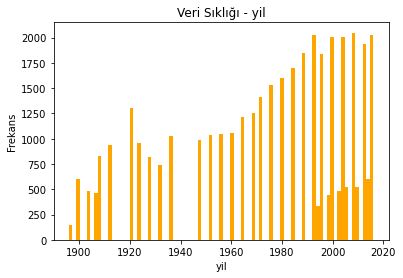

In [16]:
#tüm sayısal değişkenler için histogramları çizdirelim
sayısal_degisken = ["yas","boy","kilo","yil"]
for i in sayısal_degisken:
    plotHistogram(i)

In [48]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


[]

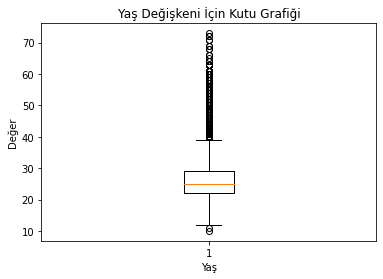

In [17]:
plt.boxplot(veri.yas)
plt.title("Yaş Değişkeni İçin Kutu Grafiği")
plt.xlabel("Yaş")
plt.ylabel("Değer")
plt.plot()


# Kategorik Değişkenler

In [18]:
#öncelikle çubuk grafiğini çizdireceğimiz metodu yazalım
def plotBar(degisken,n=5):
    '''
        Girdi: Değişken/sütun ismi
               n= gösterilecek eşsiz değer sayısı(
                  hepsini göstermek istemediğimiz için sınırladık)
        Çıktı: Çubuk grafiği
    '''
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    
    plt.figure()
    plt.bar(veri_sayma.index,veri_sayma,color="orange")
    plt.xticks(veri_sayma.index,veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("frekans")
    plt.title("veri sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken,veri_sayma))
     

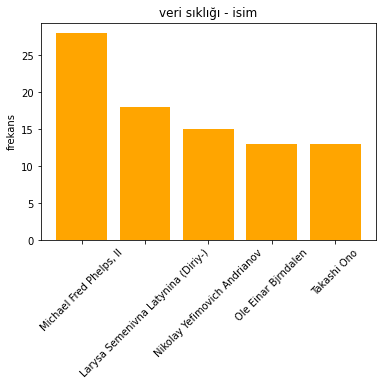

isim: 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Takashi Ono                           13
Name: isim, dtype: int64


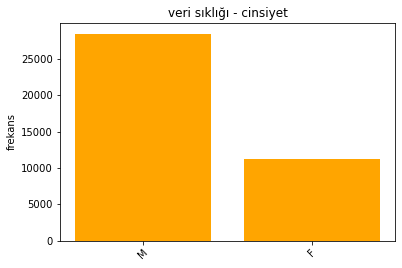

cinsiyet: 
 M    28530
F    11253
Name: cinsiyet, dtype: int64


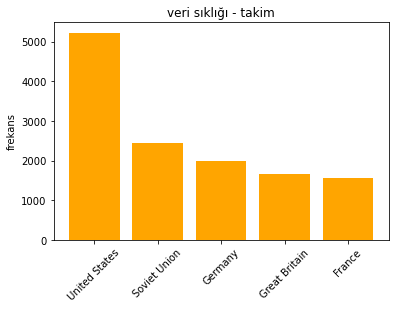

takim: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


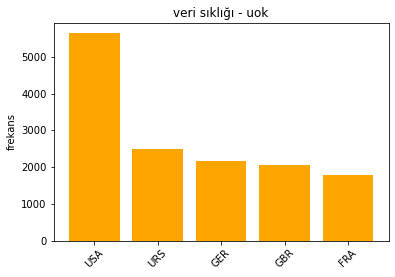

uok: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


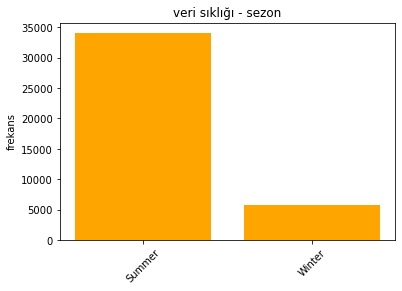

sezon: 
 Summer    34088
Winter     5695
Name: sezon, dtype: int64


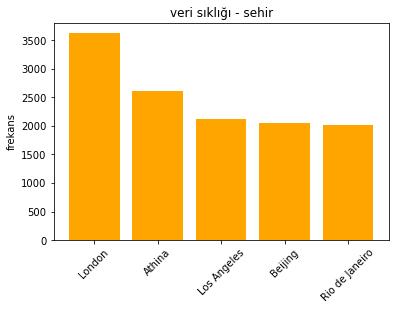

sehir: 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


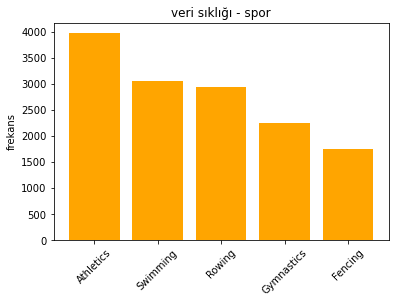

spor: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


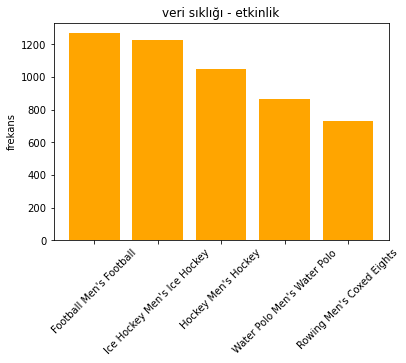

etkinlik: 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


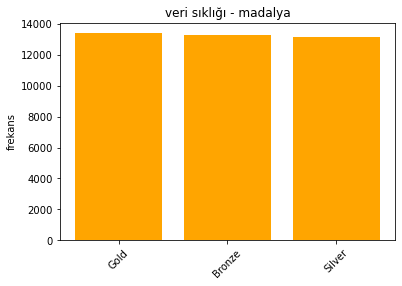

madalya: 
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [19]:
kategorik_degisken = ["isim","cinsiyet","takim","uok","sezon","sehir","spor","etkinlik","madalya"]
for i in kategorik_degisken:
    plotBar(i)

# İki Değişkenli Veri Analizi

## Cinsiyete Göre Boy ve Ağırlık Karşılaştırılması

In [20]:
erkek = veri[veri.cinsiyet == "M"]
erkek.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [21]:
kadın = veri[veri.cinsiyet =="F"]
kadın.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


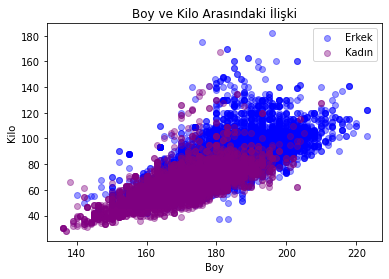

In [23]:
plt.figure()
plt.scatter(erkek.boy,erkek.kilo,alpha=0.4,label="Erkek",color="blue")
plt.scatter(kadın.boy,kadın.kilo,alpha=0.4,label="Kadın",color="purple")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

## Sayısal Sütunlar Arasında İlişki incelemesi

In [24]:
veri.loc[:,["yas","boy","kilo"]].corr()  #korelasyon tablosu


,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


## Madalya ve Yaş Arasındaki ilişki

In [25]:
#sayısal ve sözel(kategorik) veriyi karşılaştıramayız.
#bu yüzden get_dummies ile sayısala dönüşüm yapıyoruz

#sporcuları madalyalarına göre ayıralım
veri_gecici =veri.copy()
veri_gecici =pd.get_dummies(veri_gecici,columns=["madalya"])
veri_gecici.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [26]:
veri_gecici.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


## Takımların Kazandıkları Altın, Gümüş ve Bronz Madalya Sayıları

In [27]:
veri_gecici[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"],as_index=False).sum().sort_values(by= "madalya_Gold",ascending=False)[:10]
# .groupby("x")                         ---- x bazında grupla
# .sum()                                ---- gruptaki toplam sayıyı hesapla
# .sort_values(by="a",ascending=False ) ---- a'ya göre,azalan şekilde sırala
# [:10]                                 ---- ilk on veriyi göster

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0


## Kazanılan Madalyaların Hangi Şehirlerde Kazanıldığı

In [28]:
veri_gecici[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["sehir"],as_index=False).sum().sort_values(by= "madalya_Gold",ascending=False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


## Cinsiyete Göre Kazanılan Madalyalar

In [29]:
veri_gecici[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["cinsiyet"],as_index=False).sum().sort_values(by= "madalya_Gold",ascending=False)

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


# Çok Değişkenli Veri Analizi

## Pivot Tablosu

In [30]:
veri_pivot = veri.pivot_table(index= "madalya",columns="cinsiyet",
                             values = ["boy","kilo","yas"],
                             aggfunc= {"boy":np.mean,"kilo":np.mean,"yas":[min,max,np.std]})
veri_pivot.head(5)

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

## Anomali Tespiti

Aykırı değerlerin bulunması

In [31]:
def anomaliTespiti(df,ozellik):
    outlier_indices=[]
    
    for c in ozellik:
        #1.çeyrek
        Q1 = np.percentile(df[c],25)
        #3.çeyrek
        Q3 = np.percentile(df[c],75)
        #IQR = Inter Qurtile Range
        IQR = Q3 - Q1
        #aykırı değerler için ek adım miktarı
        outlier_step =1.5*IQR
        #aykırı değeri ve bulunduğu indeksi tespit edelim
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]>Q3 + outlier_step) ].index
        #tespit edilen indeksleri depolayalım
        outlier_indices.extend(outlier_list_col)
        
    #eşsiz aykırı değerleri bulalım
    outlier_indices = Counter(outlier_indices)
    #eğer bir örnek v adet sütunda farklı değer ise bunu aykırı kabul edelim
    multiple_outliers = list(i for i,v in outlier_indices.items() if v>1)
    
    return multiple_outliers
        

In [32]:
veri_anomali = veri.loc[anomaliTespiti(veri,["yas","kilo","boy"])]
veri_anomali.spor.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Wrestling          1
Figure Skating     1
Shooting           1
Name: spor, dtype: int64

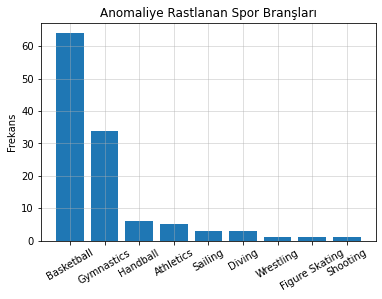

In [33]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index,veri_anomali.spor.value_counts().values)
plt.xticks(rotation=30)
plt.ylabel("Frekans")
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.grid(True,alpha=0.5)
plt.show()


In [34]:
veri_gym = veri_anomali[veri_anomali.spor=="Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [35]:
veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Horse Vault               1
Gymnastics Women's Individual All-Around     1
Name: etkinlik, dtype: int64

In [36]:
veri_basketbol = veri_anomali[veri_anomali.spor=="Basketball"]
veri_basketbol

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [37]:
veri_basketbol.etkinlik.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64

# Zaman Serilerinde Veri Analizi

* Yıllara göre ortalama Yaş, Boy ve Kilo Değişimi
* Yıllara göre madalya sayıları

In [38]:
veri_zaman = veri.copy()
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [39]:
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [40]:
#olimpiyatların yapıldığı yılları sıralayalım
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

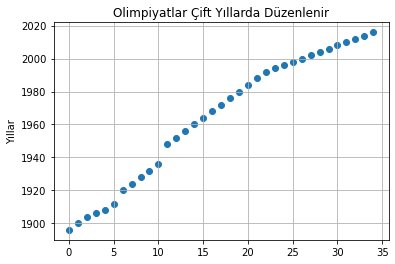

In [41]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [42]:
#veri içerisinde bulunan yıl değerlerini datetime veri tipine dönüştürelim
tarih_saat_nesnesi= pd.to_datetime(veri_zaman["yil"],format="%Y")
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yil, dtype: datetime64[ns]

In [43]:
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [44]:
#veri_zaman değişkeninin ana indeksini tarih_saatdeğerine güncelleyelim
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis=1,inplace= True)
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


## Yıllara Göre Ortalama Yaş ,Boy ve Kilo Değişimi

In [45]:
periyodik_veri = veri_zaman.resample("2A").mean()  #2 yıllık periyodlar halinde ortalama değerler
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [46]:
#kayıp verileri çıkaralım
periyodik_veri.dropna(axis=0, inplace=True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 432x288 with 0 Axes>

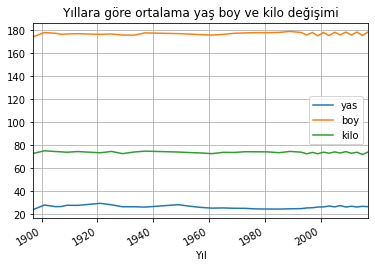

In [47]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara göre ortalama yaş boy ve kilo değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

## Yıllara Göre Madalya Sayıları

In [48]:
veri_zaman = pd.get_dummies(veri_zaman,columns=["madalya"])
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [49]:
periyodik_veri = veri_zaman.resample("2A").sum()

#kayıp verileri çıkaralım
periyodik_veri = periyodik_veri[~(periyodik_veri==0).any(axis=1)]
periyodik_veri.tail()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


<Figure size 432x288 with 0 Axes>

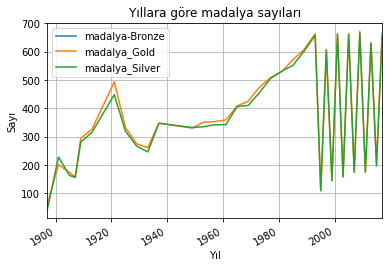

In [50]:
plt.figure()
periyodik_veri.loc[:,["madalya-Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()


## Yıllara ve Sezonlara Göre Madalya Sayıları

In [51]:
yaz = veri_zaman[veri_zaman.sezon == "Summer"]
kis = veri_zaman[veri_zaman.sezon == "Winter"]
kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [52]:
periyodik_veri_kis = kis.resample("A").sum()
periyodik_veri_kis = periyodik_veri_kis[~(periyodik_veri_kis == 0).any(axis=1)]
periyodik_veri_kis.head()
# NAN değerler çıkarılmış oldu

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [53]:
periyodik_veri_yaz = yaz.resample("A").sum()
periyodik_veri_yaz = periyodik_veri_yaz[~(periyodik_veri_yaz == 0).any(axis=1)]
periyodik_veri_yaz.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0
1906-12-31,12127.56,80767.19,33925.06,145.0,157.0,156.0
1908-12-31,22907.96,146806.47,61262.24,256.0,294.0,281.0


<Figure size 432x288 with 0 Axes>

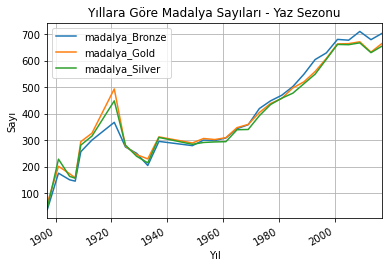

<Figure size 432x288 with 0 Axes>

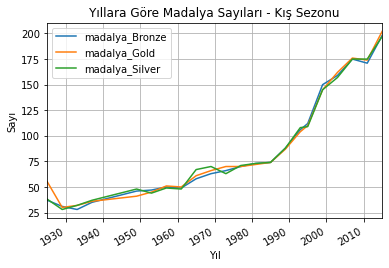

In [54]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()  #zaman serisi olduğu için plot kullanıyoruz
plt.title("Yıllara Göre Madalya Sayıları - Yaz Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot() 
plt.title("Yıllara Göre Madalya Sayıları - Kış Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()